# Plotting Time Series
First, import relevant libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

Then, load the data (takes a few moments):

In [110]:
# Load data
# Note that since dates and hours are *truncated*, not rounded, we want to translate each data point to 
# the midpoint of the day or hour. Hence, adding a Timedelta.
df1 = pd.read_csv("/mnt/data/shared/aws-data/restricted-data/CDR-data/cust_foreigners_timeseries_GEN.csv")
df1['date_'] = pd.to_datetime(df1['date_'], format='%Y-%m-%d %H:%M:%S') + pd.Timedelta(hours=12)
df2 = pd.read_csv("/mnt/data/shared/aws-data/restricted-data/CDR-data/cust_foreigners_timeseries_hourly_GEN.csv")
df2['hour_'] = pd.to_datetime(df2['hour_'], format='%Y-%m-%d %H:%M:%S') + pd.Timedelta(minutes=30)

In [111]:
df1.head()

,cust_id,country,date_,calls,in_florence,in_florence_comune
0,123,Turkey,2016-07-28,3,3,0
1,123,Turkey,2016-07-29,33,33,7
2,123,Turkey,2016-07-30,4,4,2
3,123,Turkey,2016-07-31,24,11,10
4,123,Turkey,2016-08-01,52,0,0


In [112]:
df2.head()

,cust_id,country,hour_,calls,in_florence,in_florence_comune
0,123,Turkey,2016-07-28 21:30:00,2,2,0
1,123,Turkey,2016-07-28 22:30:00,1,1,0
2,123,Turkey,2016-07-29 09:30:00,3,3,0
3,123,Turkey,2016-07-29 10:30:00,2,2,0
4,123,Turkey,2016-07-29 12:30:00,2,2,2


In [117]:
df1['I_calls'] = df1['calls']>=1
df1['I_in_florence'] = df1['in_florence']>=1
df1['I_in_florence_comune'] = df1['in_florence_comune']>=1
df1.head()

,cust_id,country,date_,calls,in_florence,in_florence_comune,I_calls,I_in_florence,I_in_florence_comune
0,123,Turkey,2016-07-28,3,3,0,True,True,False
1,123,Turkey,2016-07-29,33,33,7,True,True,True
2,123,Turkey,2016-07-30,4,4,2,True,True,True
3,123,Turkey,2016-07-31,24,11,10,True,True,True
4,123,Turkey,2016-08-01,52,0,0,True,False,False


In [118]:
df2['I_calls'] = df2['calls']>=1
df2['I_in_florence'] = df2['in_florence']>=1
df2['I_in_florence_comune'] = df2['in_florence_comune']>=1
df2.head()

,cust_id,country,hour_,calls,in_florence,in_florence_comune,I_calls,I_in_florence,I_in_florence_comune
0,123,Turkey,2016-07-28 21:30:00,2,2,0,True,True,False
1,123,Turkey,2016-07-28 22:30:00,1,1,0,True,True,False
2,123,Turkey,2016-07-29 09:30:00,3,3,0,True,True,False
3,123,Turkey,2016-07-29 10:30:00,2,2,0,True,True,False
4,123,Turkey,2016-07-29 12:30:00,2,2,2,True,True,True


In [119]:
ts1 = df1.groupby('date_').sum()
ts1.index.name = 'date'
ts1.reset_index(inplace=True)
ts1['date'] = pd.to_datetime(ts1['date'], format='%Y-%m-%d %H:%M:%S')
ts1.head()

,date,cust_id,calls,in_florence,in_florence_comune,I_calls,I_in_florence,I_in_florence_comune
0,2016-06-01,201020942526,157237,72983,23107,14198.0,10018.0,6739.0
1,2016-06-02,237712410717,152047,72267,24443,16547.0,11148.0,7201.0
2,2016-06-03,265979472407,183807,76197,25787,18517.0,11510.0,7294.0
3,2016-06-04,270761083770,158129,60812,21093,18724.0,10449.0,6331.0
4,2016-06-05,260459725696,137389,52931,17917,17901.0,9564.0,5500.0


In [120]:
ts2 = df2.groupby('hour_').sum()
ts2.index.name = 'hour'
ts2.reset_index(inplace=True)
ts2['hour'] = pd.to_datetime(ts2['hour'], format='%Y-%m-%d')
ts2.head()

,hour,cust_id,calls,in_florence,in_florence_comune,I_calls,I_in_florence,I_in_florence_comune
0,2016-06-01 00:30:00,14007090952,2682,1272,452,960.0,519.0,222.0
1,2016-06-01 01:30:00,9827959826,2052,922,273,668.0,348.0,151.0
2,2016-06-01 02:30:00,9917233557,2009,890,303,679.0,325.0,155.0
3,2016-06-01 03:30:00,11536030359,2232,908,329,766.0,363.0,181.0
4,2016-06-01 04:30:00,11005305322,2189,767,315,753.0,344.0,178.0


In [121]:
highlight_start = ts1['date'][ts1['date'].dt.dayofweek==5]
highlight_end = ts1['date'][ts1['date'].dt.dayofweek==0]

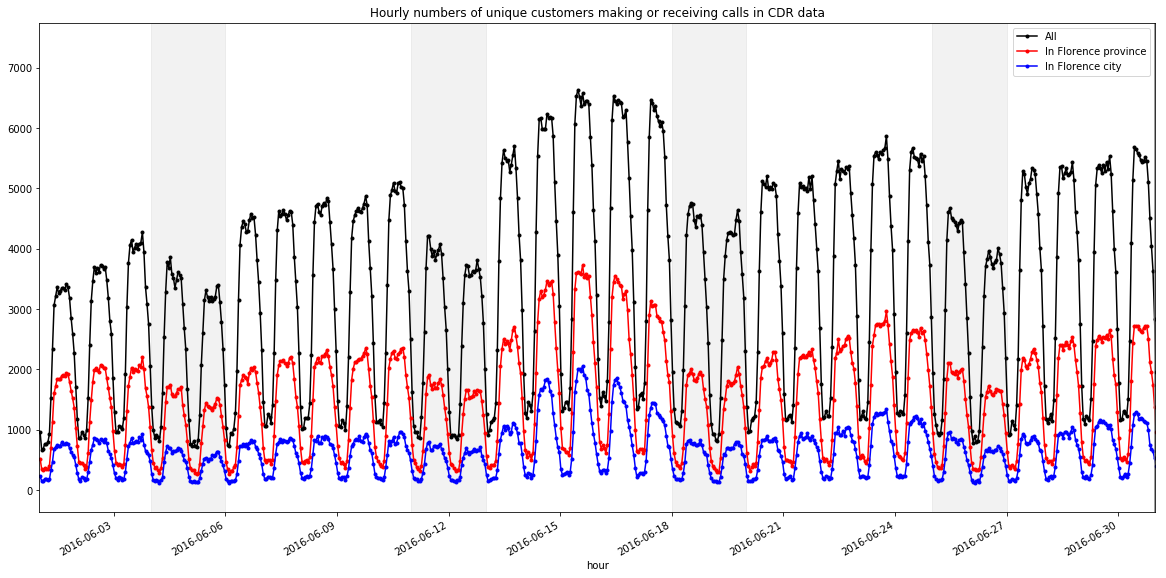

In [131]:
plt.figure(figsize=(20, 10))
ax = plt.gca()

ts2.plot.line(x='hour', y='I_calls', ax=ax, color='black', style='.-')
ts2.plot.line(x='hour', y='I_in_florence', ax=ax, color='red', style='.-')
ts2.plot.line(x='hour', y='I_in_florence_comune', ax=ax, color='blue', style='.-')

# ts1.plot.line(x='date', y='I_calls', ax=ax, color='black', style='.-')
# ts1.plot.line(x='date', y='I_in_florence', ax=ax, color='red', style='.-')
# ts1.plot.line(x='date', y='I_in_florence_comune', ax=ax, color='blue', style='.-')


for i in range(len(highlight_start)):
        ax.axvspan(highlight_start.iloc[i],highlight_end.iloc[i],alpha=.1,color="gray")

plt.axvline('2016-07-01',color="gray")
plt.axvline('2016-08-01',color="gray")
plt.axvline('2016-09-01',color="gray")

ax.legend(labels=['All','In Florence province','In Florence city'])
plt.title('Hourly numbers of unique foreign customers making or receiving calls in CDR data')

ax.set_xlim(['2016-06-01','2016-07-01'])

plt.show()

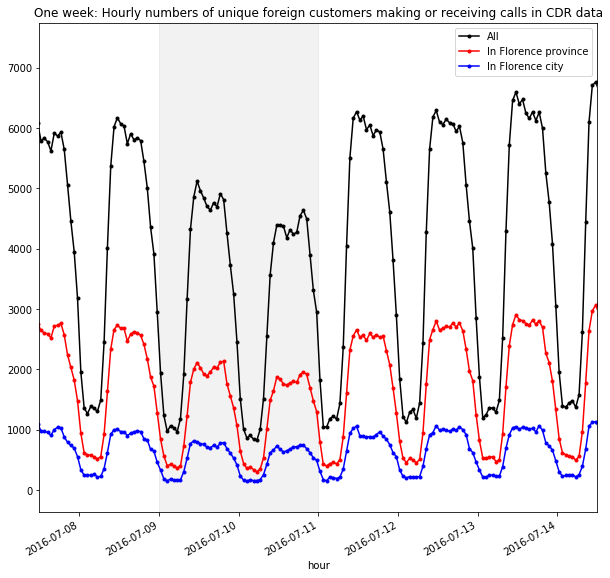

In [141]:
plt.figure(figsize=(10, 10))
ax = plt.gca()

ts2.plot.line(x='hour', y='I_calls', ax=ax, color='black', style='.-')
ts2.plot.line(x='hour', y='I_in_florence', ax=ax, color='red', style='.-')
ts2.plot.line(x='hour', y='I_in_florence_comune', ax=ax, color='blue', style='.-')

# ts1.plot.line(x='date', y='I_calls', ax=ax, color='black', style='.-')
# ts1.plot.line(x='date', y='I_in_florence', ax=ax, color='red', style='.-')
# ts1.plot.line(x='date', y='I_in_florence_comune', ax=ax, color='blue', style='.-')


for i in range(len(highlight_start)):
        ax.axvspan(highlight_start.iloc[i],highlight_end.iloc[i],alpha=.1,color="gray")

plt.axvline('2016-07-01',color="gray")
plt.axvline('2016-08-01',color="gray")
plt.axvline('2016-09-01',color="gray")

ax.legend(labels=['All','In Florence province','In Florence city'])
plt.title('One week: Hourly numbers of unique foreign customers making or receiving calls in CDR data')

ax.set_xlim(['2016-07-07 12:00:00','2016-07-14 12:00:00'])

plt.show()

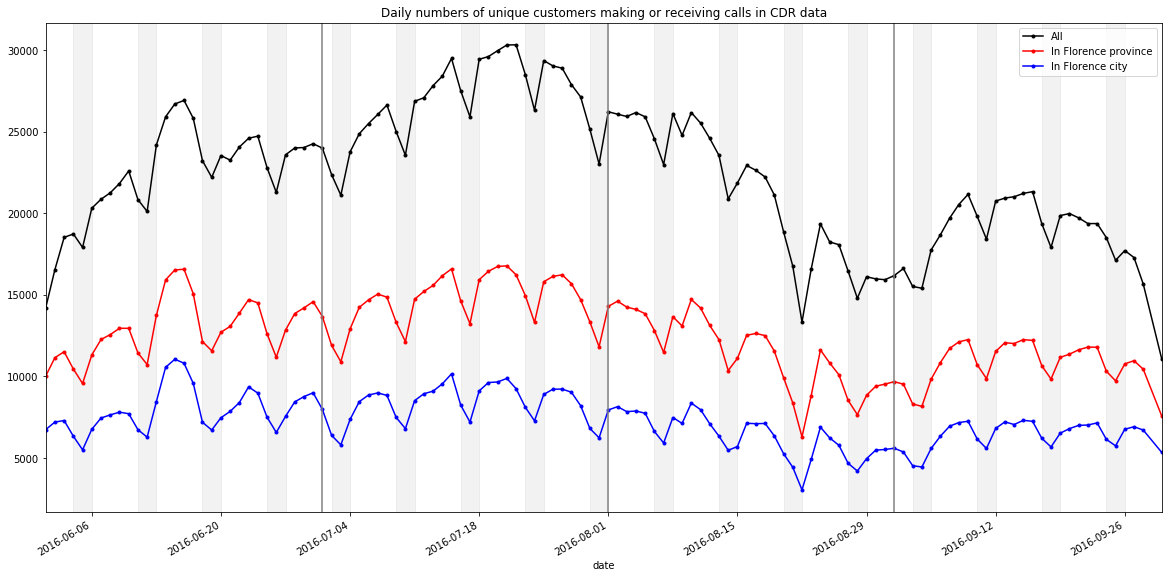

In [132]:
plt.figure(figsize=(20, 10))
ax = plt.gca()

ts1.plot.line(x='date', y='I_calls', ax=ax, color='black', style='.-')
ts1.plot.line(x='date', y='I_in_florence', ax=ax, color='red', style='.-')
ts1.plot.line(x='date', y='I_in_florence_comune', ax=ax, color='blue', style='.-')

for i in range(len(highlight_start)):
        ax.axvspan(highlight_start.iloc[i],highlight_end.iloc[i],alpha=.1,color="gray")

plt.axvline('2016-07-01',color="gray")
plt.axvline('2016-08-01',color="gray")
plt.axvline('2016-09-01',color="gray")

ax.legend(labels=['All','In Florence province','In Florence city'])
plt.title('Daily numbers of unique foreign customers making or receiving calls in CDR data')

# ax.set_xlim(['2016-06-01','2016-07-01'])

plt.show()